# The RWTH-1 Borehole  
In this notebook, we take a look at temperature data from the RWTH-1 Borehole, drilled near the main building of the RWTH. Its initial purpose was to provide geothermal energy for space heating the newly built [Super-C](https://de.wikipedia.org/wiki/SuperC). Unfotunately, originally predicted **production** temperatures of 60 °C were not met. The water, pumped from a depth of about 2 km, has a temperature of just 31 °C when reaching the surface.  
But the borehole is not _cold_. Bottom Hole Temperatures (BHTs) of about 78.6 °C at a depth of about 2500 m suggest a normal average geothermal gradient at this location.  

The task is to visualize the average temperature gradient in the borehole. For this, we need at least information about temperatures at the surface and at depth:  
* T$_{surface}$ = 10.5 °C $\pm$ 2 °C  
* T$_{2550 m}$ = 78.6 °C $\pm$ 3 °C

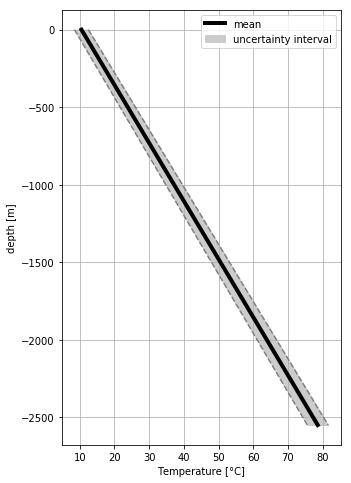

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#from pylab import *
temp = np.array([10.5, 78.6])  
depth = np.array([0, -2550])
err = np.array([2, 3])

fig = plt.figure(figsize=[5,8])
plt.fill_betweenx(depth,temp-err,temp+err, color=(.8,.8,.8), label='uncertainty interval')
plt.plot(temp,depth,'-', linewidth=4, color='black', label='mean')
plt.plot(temp-err,depth,'--', color='gray')
plt.plot(temp+err,depth,'--', color='gray')
plt.legend()
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.grid(True)

Using this data, what is the average geothermal gradient? 

In [29]:
grad = np.round(((temp[1]-temp[0])/(depth[1]-depth[0])*-1000),2)
print("The mean geothermal gradient over the borehole is {} K/km".format(grad))

The mean geothermal gradient over the borehole is 26.71 K/km


This is obviously just an approximation/simplification, - what could be possible reasons for a deviation from a straight line?

The real geothermal gradient shows variation with depth, reasons for this may be:  

* layers of different thermal conductivities, i.e. heteorogeneity
* (vertical) advective heat transport    

Core measurements of the RWTH-1 well yielded an average thermal conductivity of the rocks of 2.99 W m${-1}$ K$^{-1}$ (using the geometric mean). If we neglect possible advective heat transport, we can estimate the specific heat flow in this area by applying _Fourier's Law of Heat Conduction_:  

$$q = -\lambda \nabla T$$

As we assess just the vertical specific heat flow, $\nabla T$ becomes $\frac{\partial T}{\partial z}$.

In [35]:
tc = 2.99 # thermal conductivity in W/(mK)  
q = -tc * grad  
print("The magnitude of the average specific heat flow is {} mW/m²"
      .format(np.round(np.abs(q),2)))

The magnitude of the average specific heat flow is 79.86 mW/m²


If we compare this value to the position on Aachen on a [Heat flow map](http://www.geni.org/globalenergy/library/renewable-energy-resources/europe/Geothermal/Geothermal%20heat%20-%20Potential_files/6-1-100.gif), we see that despite **a lot** of simplifications, the calculated specific heat flow is still in the right interval.